In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [3]:
test_cases = [0,1,2,3,4,5,'train_83p']
y_pred = np.empty((0,6,21))
y_gt = np.empty((0,6,21))

for tc in test_cases:
    print(f"start {tc}")
    model_folder = f"../training/saved/2024-04-03/{tc}_1_8_octaves"
    archive = np.load(model_folder + "/predictions.npz")
    print(f"{tc}: loaded archive")
    y_pred = np.concatenate((y_pred, archive["y_pred"]), axis=0)
    print(f"{tc}: loaded pred")
    y_gt = np.concatenate((y_gt, archive["y_gt"]), axis=0)
    print(f"{tc}: loaded gt")

start 0
0: loaded archive
0: loaded pred
0: loaded gt
start 1
1: loaded archive
1: loaded pred
1: loaded gt
start 2
2: loaded archive
2: loaded pred
2: loaded gt
start 3
3: loaded archive
3: loaded pred
3: loaded gt
start 4
4: loaded archive
4: loaded pred
4: loaded gt
start 5
5: loaded archive
5: loaded pred
5: loaded gt
start train_83p
train_83p: loaded archive
train_83p: loaded pred
train_83p: loaded gt


In [4]:
# gt_total - total number in gt samples
# rt - right tab
# wtrn - wrong tab, right note
# x - nothing

frets = []
for i in range(0,6):
    frets.append([])
    for j in range(0,20):
        frets[i].append({
                "gt_total" : 0,
                "rt" : 0,
                "wtrn" : 0,
                "x" : 0
        })

l = len(y_pred)
for i in range(l):
    gt_tab = y_gt[i]
    pred_tab = y_pred[i]

    gt_metadata = notes_and_positions(gt_tab)
    pred_metadata = notes_and_positions(pred_tab)

    for string in range(0,6):
        gt_note = gt_metadata["notes"][string]
        gt_fret = gt_metadata["frets"][string]

        if gt_fret >= 0:
            frets[string][gt_fret]["gt_total"] += 1

        pred_note = pred_metadata["notes"][string]
        pred_fret = pred_metadata["frets"][string]

        found = False
        for aux_string in range(0,6):
            if gt_note > 0 and gt_note == pred_metadata["notes"][aux_string]:
                found = True
                if string == aux_string:
                    #it found the right position
                    frets[string][gt_fret]["rt"] += 1
                else:
                    #it found the right note, but somewhere else
                    frets[string][gt_fret]["wtrn"] += 1
        if not found and gt_fret >= 0:
            frets[string][gt_fret]["x"] += 1

for i in range(0,6):
    for j in range(0,20):
        print(f"String: {i+1}, fret: {j}, total: {frets[i][j]['gt_total']}, rt: {frets[i][j]['rt']}, wtrn: {frets[i][j]['wtrn']},x: {frets[i][j]['x']}")

String: 1, fret: 0, total: 16281, rt: 13226, wtrn: 0,x: 3055
String: 1, fret: 1, total: 11608, rt: 9956, wtrn: 0,x: 1652
String: 1, fret: 2, total: 9639, rt: 8414, wtrn: 0,x: 1225
String: 1, fret: 3, total: 13553, rt: 11911, wtrn: 0,x: 1642
String: 1, fret: 4, total: 13455, rt: 10792, wtrn: 0,x: 2663
String: 1, fret: 5, total: 7483, rt: 4102, wtrn: 1617,x: 1943
String: 1, fret: 6, total: 11300, rt: 8894, wtrn: 808,x: 1913
String: 1, fret: 7, total: 3929, rt: 1283, wtrn: 1467,x: 1445
String: 1, fret: 8, total: 2519, rt: 1068, wtrn: 897,x: 830
String: 1, fret: 9, total: 1501, rt: 89, wtrn: 1216,x: 266
String: 1, fret: 10, total: 1235, rt: 83, wtrn: 678,x: 514
String: 1, fret: 11, total: 115, rt: 0, wtrn: 101,x: 14
String: 1, fret: 12, total: 162, rt: 0, wtrn: 141,x: 35
String: 1, fret: 13, total: 0, rt: 0, wtrn: 0,x: 0
String: 1, fret: 14, total: 15, rt: 0, wtrn: 13,x: 2
String: 1, fret: 15, total: 0, rt: 0, wtrn: 0,x: 0
String: 1, fret: 16, total: 0, rt: 0, wtrn: 0,x: 0
String: 1, fret:

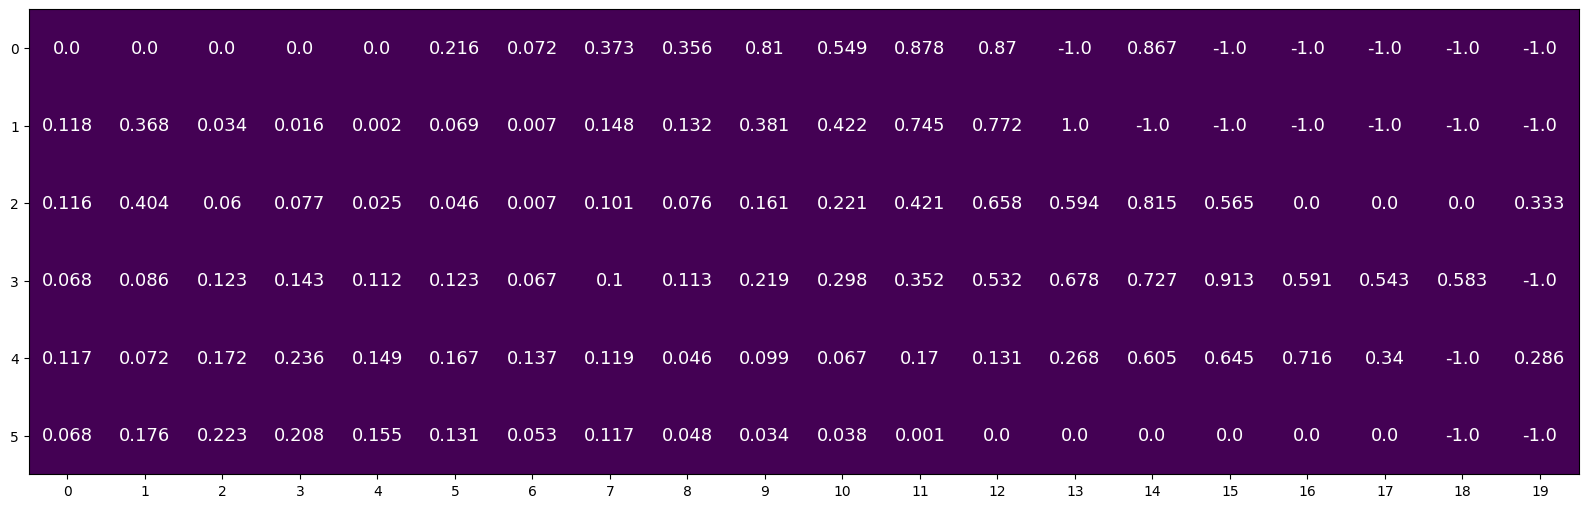

In [5]:
fig, ax = plt.subplots(figsize=(20,30))
heatmap = ax.imshow([[0]*20]*6)
for i in range(6):
    for j in range(20):
        #text = ax.text(j, i, f"T: {frets[i][j]['gt_total']}\nRN: {frets[i][j]['rt']}\n WTRN: {frets[i][j]['wtrn']}\nX: {frets[i][j]['x']}", ha="center", va="center", color="w", fontsize=8)
        value = -1.0
        if frets[i][j]['gt_total'] > 0:
            value = frets[i][j]['wtrn'] / frets[i][j]['gt_total']
        text = ax.text(j, i, round(value, 3), ha="center", va="center", color="w", fontsize=13)
plt.xticks(np.arange(0,20,1))
plt.show()

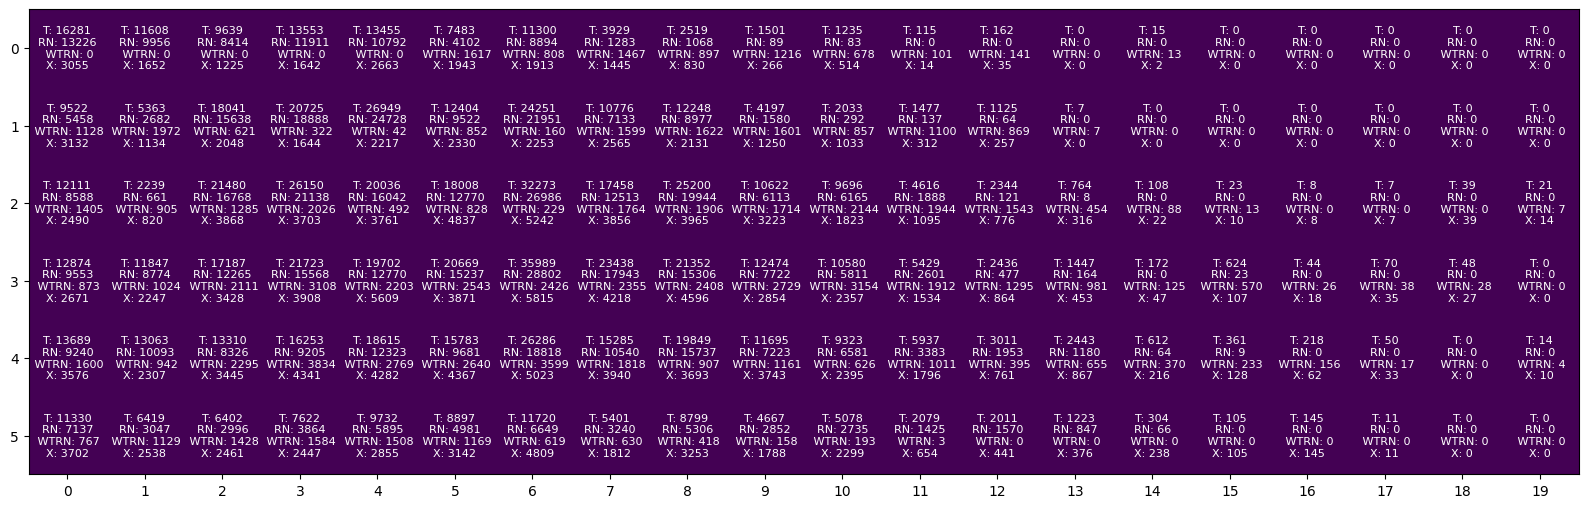

In [6]:
fig, ax = plt.subplots(figsize=(20,30))
heatmap = ax.imshow([[0]*20]*6)
for i in range(6):
    for j in range(20):
        text = ax.text(j, i, f"T: {frets[i][j]['gt_total']}\nRN: {frets[i][j]['rt']}\n WTRN: {frets[i][j]['wtrn']}\nX: {frets[i][j]['x']}", ha="center", va="center", color="w", fontsize=8)
        # value = 0.0
        # if frets[i][j]['x'] > 0:
        #     value = frets[i][j]['wtrn'] / frets[i][j]['x']
        # text = ax.text(j, i, round(value, 3), ha="center", va="center", color="w", fontsize=13)
plt.xticks(np.arange(0,20,1))
plt.show()

In [25]:
tab_performance_x = [
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
]

tab_performance_y = [
    [0.8123579632700694, 0.857684355616816, 0.8729121278140886, 0.8788460119530731, 0.8020810107766629, 0.5481758652946679, 0.7870796460176991, 0.32654619496054976, 0.4239777689559349, 0.059293804130579615, 0.06720647773279352, 0.0, 0.0, 0.0],
    [0.5731989077924806, 0.5000932314003357, 0.8668033922731556, 0.9113630880579011, 0.9175850680915804, 0.7676555949693648, 0.9051585501628798, 0.6619339272457313, 0.7329359895493142, 0.37645937574457944, 0.14363010329562223, 0.0927555856465809, 0.05688888888888889, 0.0],
    [0.7091074230038807, 0.2952210808396606, 0.780633147113594, 0.8083365200764818, 0.8006588141345578, 0.7091292758773878, 0.8361788491928237, 0.7167487684729064, 0.7914285714285715, 0.5755036716249294, 0.6358292079207921, 0.4090121317157712, 0.05162116040955631, 0.010471204188481676, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.7420382165605095, 0.7406094369882671, 0.713620759876651, 0.716659761543065, 0.648157547457111, 0.7371909623107069, 0.8003000916946845, 0.7655516682310778, 0.716841513675534, 0.6190476190476191, 0.5492438563327032, 0.4790937557561245, 0.1958128078817734, 0.11333794056668971, 0.0, 0.03685897435897436, 0.0, 0.0, 0.0],
    [0.6749945211483673, 0.7726402817117048, 0.6255447032306537, 0.5663569802498001, 0.661993016384636, 0.6133814864094279, 0.715894392452256, 0.6895649329407916, 0.7928359111290242, 0.6176143651132963, 0.70588866244771, 0.5698164055920498, 0.6486217203586848, 0.4830126893164142, 0.10457516339869281, 0.024930747922437674, 0.0, 0.0, 0.0],
    [0.6299205648720212, 0.47468453030066987, 0.46797875663855043, 0.5069535554972449, 0.6057336621454994, 0.5598516353827133, 0.567320819112628, 0.5998889094612109, 0.6030230708035004, 0.6110992071994857, 0.5385978731784167, 0.6854256854256854, 0.7807061163600199, 0.6925592804578904, 0.21710526315789475, 0.0, 0.0, 0.0]
]

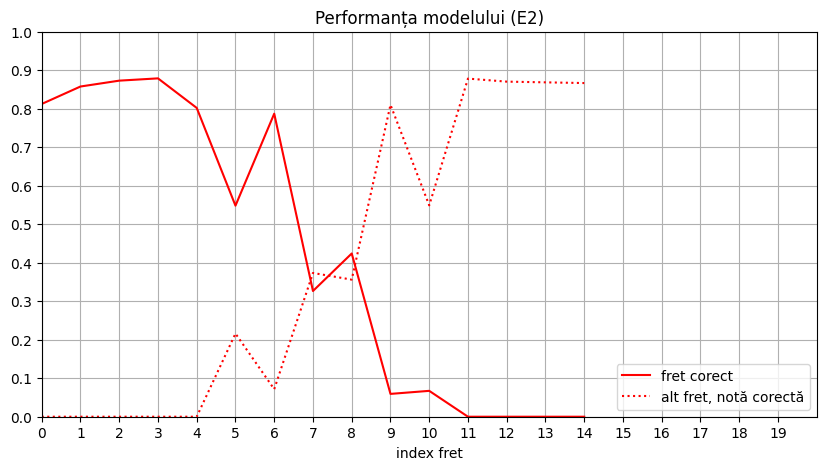

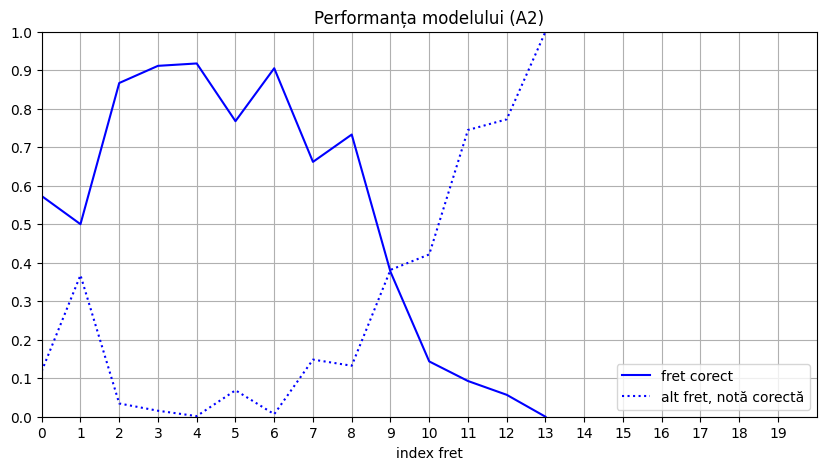

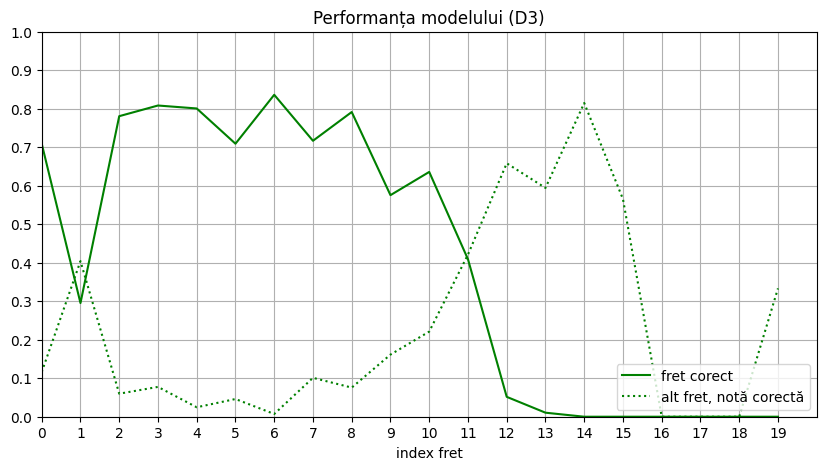

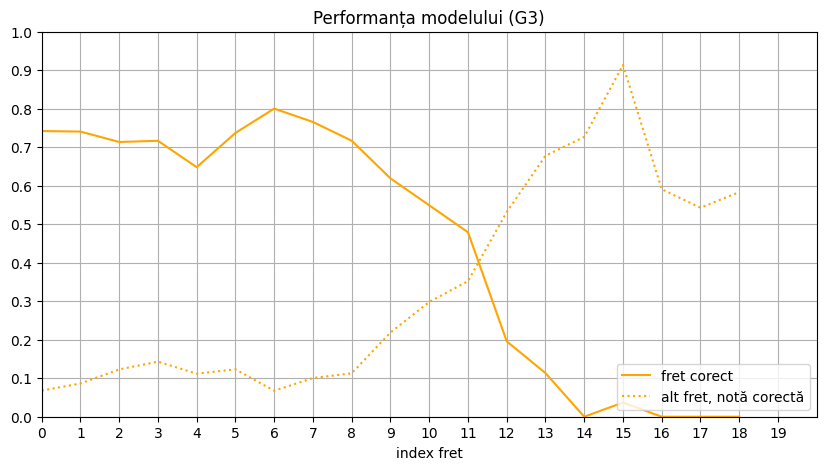

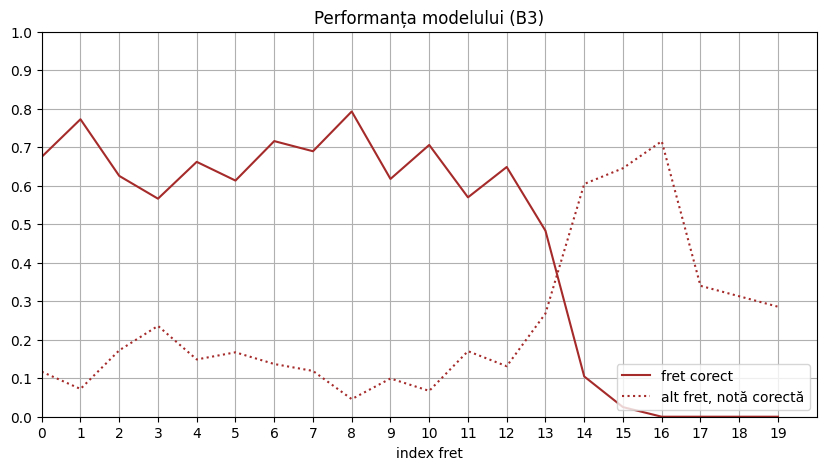

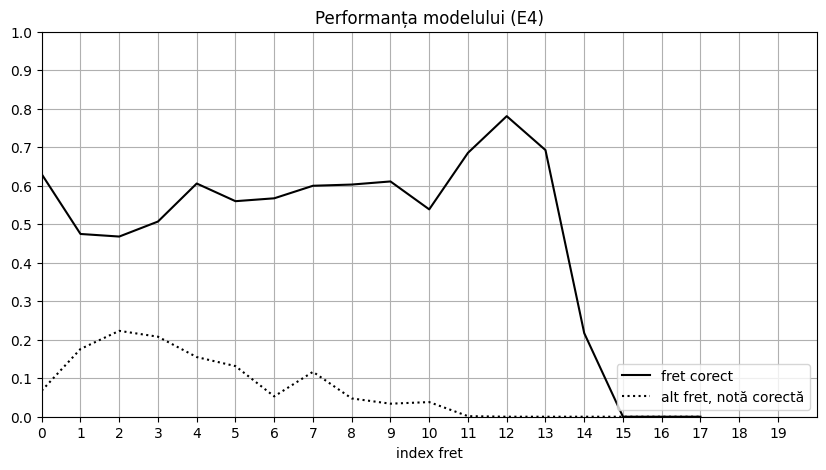

In [34]:
labels = ['E2', 'A2', 'D3', 'G3', 'B3', 'E4']
colors = ['red', 'blue', 'green', 'orange', 'brown', 'black']
for string in range(0,6):
    x = []
    y = []
    for fret in range(0,20):
        if frets[string][fret]['gt_total'] > 0:
            x.append(fret)
            y.append(frets[string][fret]['wtrn'] / frets[string][fret]['gt_total'])
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.title(labels[string])
    plt.xticks(np.arange(0, 20, step=1))
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.ylim((0,1))
    plt.xlim((0,20))
    plt.xlabel('index fret')
    plt.title(f'Performanța modelului ({labels[string]})')
    plt.plot(tab_performance_x[string], tab_performance_y[string], color=colors[string], label='fret corect')
    plt.plot(x, y, color=colors[string], linestyle='dotted', label='alt fret, notă corectă')
    plt.legend(loc='lower right')
    plt.show()